## <font color='#eb3483'>Exercise - Linear Regression with scikit-learn </font>

In this exercise we are going to build a regression model to predict movie `revenue`. The dataset we'll be using is called `movies.1.initial_process.csv`.

Go ahead and load the necessary libraries as well as the dataset.

In [70]:
from IPython.display import Image
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

In [71]:
rev = pd.read_csv("data/movies.1.initial_process.csv")
rev.head()

,belongs_to_collection,budget,genre,original_language,popularity,production_company,production_country,release_date,revenue,runtime,status,title,vote_average,vote_count
0,Father of the Bride Collection,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,NaN,Drama,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,NaN,Comedy,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0


### <font color='#eb3483'>Exercise 1</font>

Select the numerical columns and replace their missing values with 0

In [72]:
usecols = (['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count'])
rev = rev[usecols]
rev = rev.fillna(0)

### <font color='#eb3483'>Exercise 2</font>

Split the numerical data into training and test sets

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = rev[['popularity', 'budget', 'runtime', 'vote_average', 'vote_count']]  # numpy array
#not dependent on just one thing
y = rev["revenue"]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [75]:
X

,popularity,budget,runtime,vote_average,vote_count
0,8.387519,0.0,106.0,5.7,173.0
1,0.894647,0.0,106.0,6.7,13.0
2,14.569650,3500000.0,91.0,7.0,513.0
3,8.963037,0.0,87.0,6.0,124.0
4,9.592265,12000000.0,92.0,6.5,767.0
...,...,...,...,...,...
1344,0.661863,0.0,107.0,5.3,3.0
1345,0.040481,0.0,0.0,6.5,1.0
1346,0.560502,0.0,0.0,3.7,6.0
1347,0.674261,0.0,114.0,5.5,8.0


### <font color='#eb3483'>Exercise 3</font>

Create a linear regression model and fit it with the training set. 

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [58]:
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 18599102.000 Estimated value: 38165969.15759
Real value: 869.000 Estimated value: 2037342.22643
Real value: 21288692.000 Estimated value: 45786796.37716
Real value: 3867000.000 Estimated value: 8289861.83172
Real value: 159157447.000 Estimated value: 99413576.78802


### <font color='#eb3483'>Exercise 4</font>

Predict revenue using the test set. Visualize the `popularity` against actual revenue against predicted revenue. 

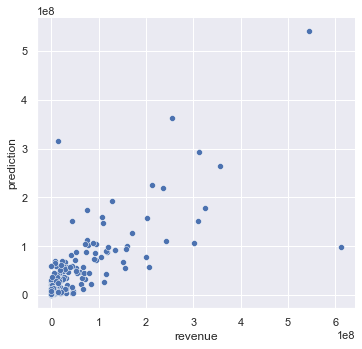

In [63]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["revenue"] = y_test.tolist()
X["prediction"] = predictions
sns.relplot(x="revenue", y="prediction", data=X, kind="scatter")

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

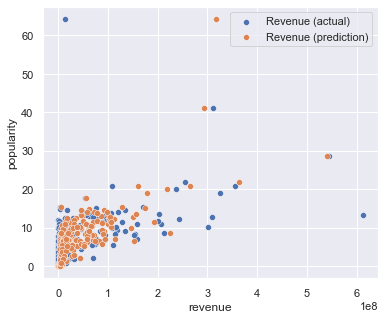

In [68]:
sns.scatterplot(x=X["revenue"], y=X["popularity"], label = 'Revenue (actual)')
sns.scatterplot(x=X["prediction"], y=X["popularity"], label = 'Revenue (prediction)')

#overfitting